In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
%matplotlib inline

## Задачи:
- Провести кластерный анализ по имеющимся районам и сравнить колличество районов с исходным значением;
- Использовать 2 метода кластеризации и сопоставить их друг другу.

## Общий вывод по методам:
- В данном случае чуть лучше отработал иерархический кластерный анализ.
- Не один из методов не смог в точности предсказать разбивку на районы исходя из базового набора данных;
- Иерархический кластерный анализ смог в большей точности предсказать район Орджоникидзевский, метод KMeans не продемонстрировал даже приблизительной точности в разбивки групп, по районам.

In [2]:
con = sqlite3.connect('database.db')
data = pd.read_sql("SELECT * FROM apartments", con)
# Удалим пустые значения:
data = data.dropna()
data1 = data[['price', 'o_m2', 'j_m2','k_m2','floor','sum_floor']]

In [3]:
# Всего имеем 5 районов:
data.groupby('area')['price'].mean()

area
Ленинский                          3741.538462
Ленинский (Левый берег)            3500.000000
Орджоникидзевский                  3888.984375
Орджоникидзевский (левый берег)    2237.500000
Правобережный                      3487.888889
Name: price, dtype: float64

In [4]:
#Проведём нормализацию
dataNorm = preprocessing.MinMaxScaler().fit_transform(data1)
dataNorm= pd.DataFrame(dataNorm, index=data1.index, columns=data1.columns)
dataNorm.head()

,price,o_m2,j_m2,k_m2,floor,sum_floor
0,0.229671,0.262178,0.388889,0.266667,0.000000,0.066667
1,0.693979,0.559456,0.666667,0.500000,0.142857,0.466667
2,0.086903,0.025788,0.266667,0.800000,0.357143,0.533333
3,0.310366,0.366046,0.444444,0.266667,0.428571,0.533333
12,0.211049,0.142550,0.222222,0.300000,0.357143,0.533333


### 1. Иерархический кластерный анализ

In [5]:
link = linkage(dataNorm, 'ward', 'euclidean')
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(130, 4)


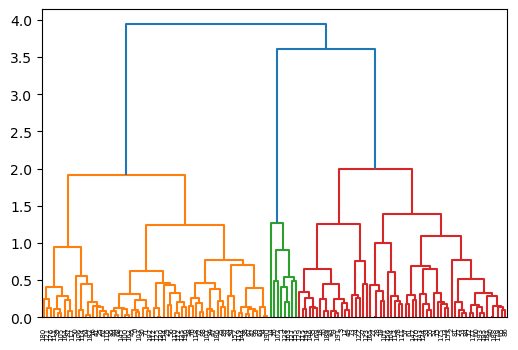

In [6]:
fig = plt.figure(figsize=(6,4))
dn = dendrogram(link, labels=dataNorm.index.tolist())

- Лучше не доверять разбиению на кластеры графика по умолчанию!

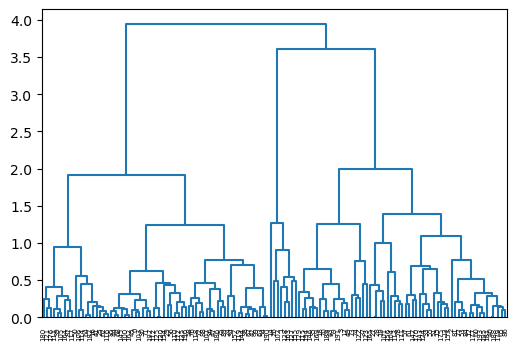

In [7]:
fig = plt.figure(figsize=(6,4))
dn = dendrogram(link, color_threshold = -1, labels=dataNorm.index.tolist())

- Как можно разглядеть на графике явно виднеются 5 кластеров, по одному на каждый район. необходимо установить порог равный - 1.5.

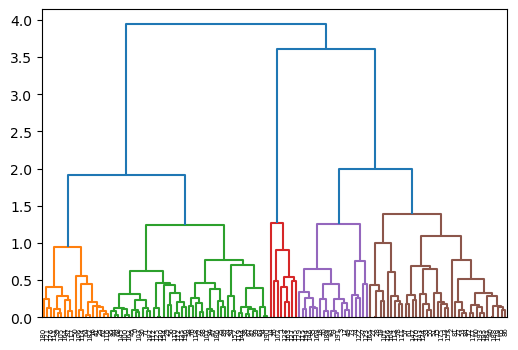

In [8]:
fig = plt.figure(figsize=(6,4))
dn = dendrogram(link, color_threshold = 1.5, labels=dataNorm.index.tolist())

- Отлично, при разъбиение мы можем чётко разглядеть 5 выделенных кластеров, которые могут быть соотнесёны к каждому району.

In [9]:
# Соотнесём кластеры по объектам(1.6 - порог растояния):
data['fcluster'] = fcluster(link, 1.5, criterion='distance')
data.groupby('fcluster').mean()

,price,o_m2,j_m2,k_m2,floor,sum_floor
fcluster,,,,,,
1,4509.473684,71.989474,47.600000,8.473684,4.000000,4.684211
2,3005.977778,45.922222,26.793333,7.351111,2.422222,4.400000
3,7968.125000,115.800000,73.375000,17.412500,7.250000,11.875000
4,4290.500000,61.300000,34.855000,9.980000,8.600000,10.450000
5,2915.000000,41.241026,21.479487,8.830769,4.717949,10.589744


In [10]:
#Список объектов попавших в кластер:
data[data['fcluster']==1]

,area,price,o_m2,j_m2,k_m2,floor,sum_floor,fcluster
16,Правобережный,4400,65.0,41.0,6.0,5,5,1
25,Орджоникидзевский,3600,65.0,45.0,9.0,5,5,1
39,Ленинский,5100,83.0,55.0,9.0,3,4,1
41,Ленинский,3750,77.0,48.0,9.0,5,5,1
50,Орджоникидзевский,2800,98.0,72.4,7.0,4,5,1
62,Правобережный,3990,63.0,42.0,9.0,5,5,1
64,Правобережный,3500,60.0,39.0,7.0,4,5,1
87,Орджоникидзевский,5100,68.5,43.0,9.0,2,5,1
105,Ленинский,5600,83.0,55.0,9.0,3,4,1
106,Орджоникидзевский (левый берег),2000,72.0,45.0,6.0,3,4,1


In [11]:
data.groupby('fcluster').size()

fcluster
1    19
2    45
3     8
4    20
5    39
dtype: int64

In [12]:
data.groupby('area').size()

area
Ленинский                          26
Ленинский (Левый берег)             1
Орджоникидзевский                  64
Орджоникидзевский (левый берег)     4
Правобережный                      36
dtype: int64

### Выводы:

- 1. Данный метод кластеризации не разбил в точности квартиры по районам, в которых осуществляется продажа, имеется сборная "солянка";
- 2. По кол-ву квартир по районам в разбике так же отсутствует точность;
- 3. Орджоникидзевский район попал практически в каждый кластер.

### 2. Построение кластеризации методом k-means

In [13]:
dataNorm.head()

,price,o_m2,j_m2,k_m2,floor,sum_floor
0,0.229671,0.262178,0.388889,0.266667,0.000000,0.066667
1,0.693979,0.559456,0.666667,0.500000,0.142857,0.466667
2,0.086903,0.025788,0.266667,0.800000,0.357143,0.533333
3,0.310366,0.366046,0.444444,0.266667,0.428571,0.533333
12,0.211049,0.142550,0.222222,0.300000,0.357143,0.533333


c:\Users\roman\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


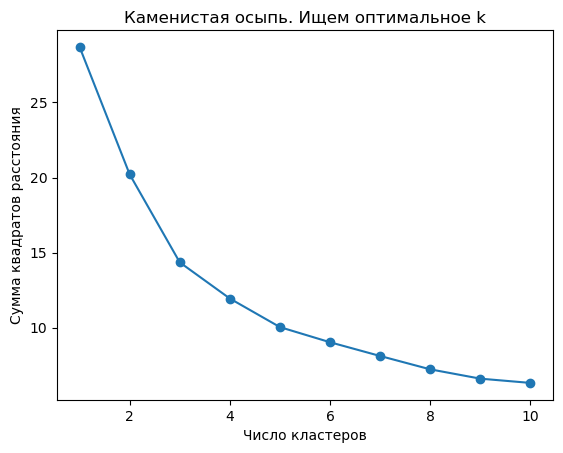

In [14]:
# Строи график каменистая осыпь:
K = range(1,11)
models = [KMeans(n_clusters=k, random_state=42,).fit(dataNorm) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояния')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

- Если приглядется, то на графике можно увидеть примерно 5 изломов;
- Предположим, что у нас 5 кластера.

In [15]:
# максимальное число итераций:
max_iter_1 = 300
# инициализация модели:
model = KMeans(n_clusters=5, random_state=42, max_iter=max_iter_1, n_init=10,
                verbose=0, tol=0.0001)

In [16]:
# Проведение кластеризации:
model.fit(dataNorm)

KMeans(n_clusters=5, random_state=42)

In [17]:
# Сколько итераций потребовалось
model.n_iter_

13

In [38]:
max_iter_2 = 9

In [39]:
model_tmp = KMeans(n_clusters=14, random_state=42, max_iter=max_iter_2, n_init=10,
                verbose=0, tol=0.0001)
model_tmp.fit(dataNorm)

KMeans(max_iter=9, n_clusters=14, random_state=42)

In [40]:
model_tmp.n_iter_

8

In [41]:
#Проверим сходимость алгоритмов:
if model_tmp.n_iter_ == max_iter_2:
    print(f'Не сошлось за {model_tmp.n_iter_} итераций')
else:
    print(f'Cошлось за {model_tmp.n_iter_} итераций')

Cошлось за 8 итераций


In [42]:
#Результаты кластеризации:
#Номер кластера начинается с 0, а не с 1
model.labels_

array([3, 4, 0, 2, 0, 0, 4, 0, 1, 2, 2, 0, 3, 1, 4, 0, 0, 3, 1, 0, 3, 2,
       3, 2, 3, 1, 0, 1, 3, 2, 3, 3, 3, 2, 1, 0, 0, 3, 0, 3, 1, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 3, 2, 3, 3, 2, 2, 3, 3, 0, 1, 0, 0, 3, 0, 1, 3,
       3, 3, 3, 0, 4, 3, 2, 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 3, 3, 1, 2,
       2, 0, 1, 4, 4, 2, 1, 1, 0, 0, 3, 3, 2, 3, 0, 1, 4, 2, 3, 4, 1, 0,
       2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 3, 0, 2, 3, 2, 3, 0, 2, 0, 1])

In [43]:
# Добавим результат анализа к исходным данным:
data['KMeans'] = model.labels_
data.groupby('KMeans').mean()

,price,o_m2,j_m2,k_m2,floor,sum_floor,fcluster
KMeans,,,,,,,
0,2625.333333,37.163636,18.233333,8.557576,5.030303,10.454545,5.000000
1,4386.633333,66.943333,44.026667,8.700000,3.266667,5.033333,1.566667
2,4394.166667,61.875000,35.545833,10.108333,7.750000,10.750000,4.166667
3,2687.472222,43.027778,24.147222,6.938889,2.527778,4.305556,2.000000
4,7968.125000,115.800000,73.375000,17.412500,7.250000,11.875000,3.000000


- Таблица очень похожа на ту, которую мы получили в иерархическом кластерном анализе.

In [75]:
# координаты центров кластера:
model.cluster_centers_

array([[0.20177943, 0.12008336, 0.20259259, 0.28525253, 0.28787879,
        0.56363636],
       [0.42043865, 0.33340497, 0.48918519, 0.29      , 0.16190476,
        0.20222222],
       [0.42137389, 0.29709885, 0.3949537 , 0.33694444, 0.48214286,
        0.58333333],
       [0.20949376, 0.1620901 , 0.26830247, 0.2312963 , 0.10912698,
        0.1537037 ],
       [0.86506828, 0.68338109, 0.81527778, 0.58041667, 0.44642857,
        0.65833333]])

In [76]:
# Проверим работу кластера:
new_item = [
    [1,1,1,1,1,1],
    [0,0,0,0,0,0]
]
model.predict(new_item)
# Модель правильно соотнесла наши заданные параметры, так как 1 - это тот кластер(2), где самые большие параметры;
# 0 - наименьшие параметры, отнесёно в кластер 1.

c:\Users\roman\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4, 3])

In [77]:
data.groupby('KMeans').size()

KMeans
0    33
1    30
2    24
3    36
4     8
dtype: int64

In [78]:
data.groupby('area').size()

area
Ленинский                          26
Ленинский (Левый берег)             1
Орджоникидзевский                  64
Орджоникидзевский (левый берег)     4
Правобережный                      36
dtype: int64

- р.Орджоникидзевский очень большой по численности, KMeans не отразил этот факт у себя в разбивке;
- Точной разбики по квартирам, как и ожидалось - не получилось.

In [57]:
#Список объектов попавших в кластер:
data[data['KMeans']==1]

,area,price,o_m2,j_m2,k_m2,floor,sum_floor,fcluster,KMeans
16,Правобережный,4400,65.0,41.0,6.0,5,5,1,1
25,Орджоникидзевский,3600,65.0,45.0,9.0,5,5,1,1
30,Правобережный,3350,55.7,41.0,7.0,1,5,2,1
39,Ленинский,5100,83.0,55.0,9.0,3,4,1,1
41,Ленинский,3750,77.0,48.0,9.0,5,5,1,1
50,Орджоникидзевский,2800,98.0,72.4,7.0,4,5,1,1
57,Орджоникидзевский,3700,58.0,38.0,10.0,1,10,5,1
62,Правобережный,3990,63.0,42.0,9.0,5,5,1,1
64,Правобережный,3500,60.0,39.0,7.0,4,5,1,1
78,Орджоникидзевский,3699,65.0,42.0,9.0,3,9,5,1


### Выводы:


- 1. Сложно сказать по качеству полученной разбивки кластеров, т.к очень большая путаница;
- 2. Орджоникидзевский (левый берег) - не смог предсказать.
- 3. Ленинский - был соотнесён в 1 кластере, но метод не смог отделить эти значения от остальных.
- 4. Правобережный - Плохо соотнёс. район разбит по разным кластерам.